# Document Clustering using LLM Embeddings

Workflow summary

Use a pre-trained transformer-based embedding model (e.g. from sentence-transformers) to convert each document into a dense vector (“embedding”) that captures semantic meaning.

Use a clustering algorithm (e.g. K-Means) on those embedding vectors to group similar documents.
programminghistorian.org

Optionally reduce dimensionality (e.g. via PCA or UMAP) to visualize clusters.

# Document Clustering using Transformer Embeddings + K-Means


In [2]:
# Install dependencies
!pip install -q sentence-transformers sklearn umap-learn matplotlib


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
# Imports
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt


In [4]:
# Sample documents (you can replace this with your own list of documents)
docs = [
    "The stock market crashed in 2022 due to inflation and interest rate hikes.",
    "去年の株価暴落は金利上昇とインフレが原因だった。",
    "Machine learning enables computers to learn patterns from data and make predictions.",
    "Deep learning using neural networks has revolutionized image and speech recognition.",
    "The recipe includes flour, eggs, milk — mix and bake at 180°C for 25 minutes.",
    "A quick brown fox jumps over the lazy dog.",
    "Python's list comprehensions make code concise and readable.",
    "Gardening requires regular watering and sunlight for healthy plant growth.",
    "Stocks recovered after central bank announced lower interest rates.",
    "Cooking pasta: boil water, add salt, cook for 8 minutes and drain.",
    "Neural networks need large datasets to generalize well.",
    "花を庭に植えて水やりして育てるのはリラックス効果がある。"
]

print("Number of documents:", len(docs))


Number of documents: 12


In [5]:
# 1) Generate embeddings using a transformer model
model_name = "all-MiniLM-L6-v2"  # small but good model
embedder = SentenceTransformer(model_name)

embeddings = embedder.encode(docs, convert_to_numpy=True)
print("Embeddings shape:", embeddings.shape)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embeddings shape: (12, 384)


In [6]:
# 2) Cluster embeddings using K-Means
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

# Show cluster assignment
for i, doc in enumerate(docs):
    print(f"Doc {i:2d} → cluster {labels[i]}")


Doc  0 → cluster 1
Doc  1 → cluster 2
Doc  2 → cluster 0
Doc  3 → cluster 0
Doc  4 → cluster 0
Doc  5 → cluster 1
Doc  6 → cluster 1
Doc  7 → cluster 1
Doc  8 → cluster 1
Doc  9 → cluster 0
Doc 10 → cluster 0
Doc 11 → cluster 2


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


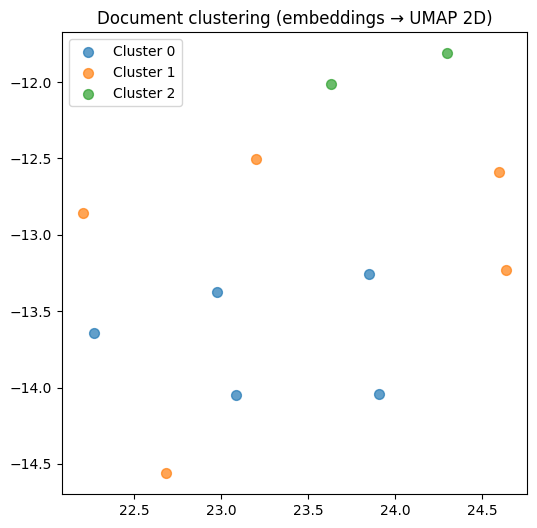

In [7]:
# 3) Visualize clusters (2D) using UMAP (or PCA)
reducer = umap.UMAP(n_components=2, random_state=42)
emb2d = reducer.fit_transform(embeddings)

plt.figure(figsize=(6,6))
for cluster in range(num_clusters):
    idx = labels == cluster
    plt.scatter(emb2d[idx, 0], emb2d[idx, 1], label=f"Cluster {cluster}", s=50, alpha=0.7)
plt.legend()
plt.title("Document clustering (embeddings → UMAP 2D)")
plt.show()


In [8]:
# 4) Inspect cluster contents (print a few docs per cluster)
for cluster in range(num_clusters):
    print(f"\n=== Cluster {cluster} ===")
    for i, doc in enumerate(docs):
        if labels[i] == cluster:
            snippet = doc if len(doc) < 100 else doc[:100] + "…"
            print("-", snippet)



=== Cluster 0 ===
- Machine learning enables computers to learn patterns from data and make predictions.
- Deep learning using neural networks has revolutionized image and speech recognition.
- The recipe includes flour, eggs, milk — mix and bake at 180°C for 25 minutes.
- Cooking pasta: boil water, add salt, cook for 8 minutes and drain.
- Neural networks need large datasets to generalize well.

=== Cluster 1 ===
- The stock market crashed in 2022 due to inflation and interest rate hikes.
- A quick brown fox jumps over the lazy dog.
- Python's list comprehensions make code concise and readable.
- Gardening requires regular watering and sunlight for healthy plant growth.
- Stocks recovered after central bank announced lower interest rates.

=== Cluster 2 ===
- 去年の株価暴落は金利上昇とインフレが原因だった。
- 花を庭に植えて水やりして育てるのはリラックス効果がある。


## Summary

- We used a pre-trained transformer embedding model (`all-MiniLM-L6-v2`) to convert raw documents into dense semantic vectors.  
- Then applied K-Means clustering on those embeddings to group semantically similar documents.  
- Used UMAP to reduce embedding space to 2D for visualization.  
- Observed clusters of documents sharing similar topics/ themes (e.g. finance, programming, cooking/gardening).  

This demonstrates how to cluster **arbitrary text documents** using state-of-the-art embeddings and standard clustering.
